# Dimension Reduction
-  Four independent labels and then we have the space, which is like roughly all of the variants and everything that can be explained can be explained with these four independent variables. Now, most of the times, or actually almost always like ninety nine point nine percent, what you have is roughly something like this. You start with a variable, which is, you know, explaining at that bit. So plenty of it. And then you add a second variable. And the second variable, of course, is adding something new. But there is this part which is overlapping, which is in a sense explaining that exact same thing. And then new that the third variable, again, explaining something new, but again, overlapping in what is explaining and giving you that, the fourth one, which would explain the rest, but overlap a lot with what was already there. And the key issue behind and let me explain to you metaphorically, you mentioned that you're making some pasta, some spaghetti.
- And the goal of dimensioned reduction is that we are going to transform from what we have here currently with the overlapping noise information to something that would be explaining the exact same thing. But it is more organized because you have one component explaining part of the variability, part of the information, and then you would have a second component explaining another part and then a third
- So without overlapping information and hence what I mentioned reduction enables us to do is that if we have multiple linear issues, it helps us solve it because we no longer have this overlapping information. If we have 100 or 200 predictors, this is something that's very good to use in order to shrink the information, reduce that noise.
- What we create is new variables.

- Dimensionn Reduction helps to solve
  1. Multicollinearity issues
  2. Computational issues of large number of predictiors
  3. Noisy models due to overfitting
  4. Create new variables (called components)
  5. Pre processing data for predictive models or forecasting

## PCA

- Key ideas
  - An algorithm for Dimension Reduction;
  - Linearly Transforms variables into components;
  - Compoenents can be determined by the percentage of varianace explained;
  - Choosing Components is more of an art than a sciecne.


# Imports

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load data

In [6]:
dataset = pd.read_csv("./data/houses_to_rent.csv")
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


transform strings into dummy (bininng):

In [7]:
dataset[["animal", "furniture"]] = pd.get_dummies(dataset[["animal", "furniture"]],
                                                  drop_first = True)
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,0,0,8000
1,0,64,2,1,1,10,0,1,820
2,1,443,5,5,4,3,0,0,7000
3,1,73,2,2,1,12,0,1,1250
4,1,19,1,1,0,0,1,1,1200


# Correlation Matrix

Find if a variable are correlatent with anothers. This a really key question. Because in regression models the multicolienarity aren`t good for them.
Many columns with correlations is the multicolinearity problem.


Isolate X, we see just independent variables between them.

In [8]:
X = dataset.drop(columns = 'rent amount')
X.head(1)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1,240,3,3,4,0,0,0


<AxesSubplot:>

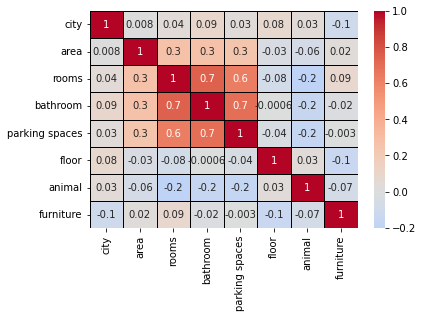

In [9]:
sns.heatmap(X.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

- Find a good color facilitate your explanation about correlation matrix.

- So, the number of bathroom and parking spaces altogheter simply because they are very correlated and they explain the same thing.

# Standardize data

We need standardize because the PCA is sensitive by data, so we need normalize MinMaxScaler, he transforma data to [0,1] and keep the distribuition before.

In [10]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1.0,0.009351,0.222222,0.222222,0.333333,0.000000,0.0,0.0
1,0.0,0.002195,0.111111,0.000000,0.083333,0.101010,0.0,1.0
2,1.0,0.017604,0.444444,0.444444,0.333333,0.030303,0.0,0.0
3,1.0,0.002561,0.111111,0.111111,0.083333,0.121212,0.0,1.0
4,1.0,0.000366,0.000000,0.000000,0.000000,0.000000,1.0,1.0


# Principal Component Analysis

Optimal number of components

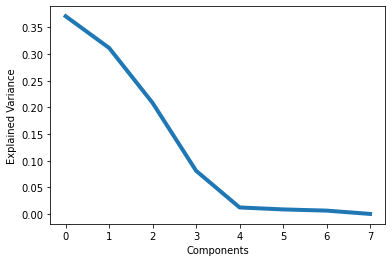

In [11]:
model = PCA(random_state=1502).fit(X_scaled)
plt.plot(model.explained_variance_ratio_,
         linewidth = 4)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

- `model.explained_variance_ratio_` how many model are explanend with n components(variables, features, columns in datasets).
- After what percent you not need more component because not adding content more for model train.(Explanatory power).
- The intention is obtained the number where the explanition have the lowest level explanation variables.

cumulative function. This a elbow graph inverted:

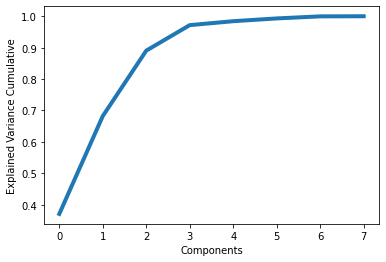

In [12]:
plt.plot(np.cumsum(model.explained_variance_ratio_),
         linewidth = 4)
plt.xlabel('Components')
plt.ylabel('Explained Variance Cumulative')
plt.show()

Note that 4 components, there aren`t variance more or explanatory power.

## apllying PCA dimension redution

In [13]:
model = PCA(n_components=4,
            random_state = 1502).fit(X_scaled)

## Interpretation 

In [14]:
model_interpretation = pd.DataFrame(model.components_,
                                    columns = X.columns)
model_interpretation

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,0.181418,-0.001894,-0.052840,-0.026016,-0.028430,0.020501,0.513750,-0.835731
1,-0.087693,-0.002332,-0.055603,-0.079433,-0.064195,-0.008521,0.847689,0.510033
2,-0.976331,-0.001294,-0.038218,-0.062905,-0.028570,-0.006666,0.009316,-0.201026
3,-0.075883,0.020620,0.487555,0.685306,0.518733,-0.011778,0.131167,-0.005982


we see that
- `city` and `animal` are high values;
- `furniture` middle values;
- `area`,`rooms`,`bathroom`,`floor` low values.

## Components

In [15]:
components = model.transform(X_scaled)
components = pd.DataFrame(components,
                          columns = ['city characteristics',
                                     'accepts animals and has furniture',
                                     'rural small place',
                                     'fantastic houses'])
components.head()

,city characteristics,accepts animals and has furniture,rural small place,fantastic houses
0,0.512212,-0.606922,0.001389,0.138911
1,-0.484093,0.029839,0.801398,-0.128672
2,0.495294,-0.637207,-0.021295,0.399360
3,-0.305152,-0.066853,-0.182058,-0.128640
4,0.217248,0.802227,-0.158314,-0.169636


- `city characteristics` because city, floor and animal are above one;
- `accepts animals and has furniture` animal and furniture are above one;
- `rural small place` city is close to -1, animal, floor and area ate close to zero;
- `fantastic houses` area, rooms, bathrooms nad parking spaces are positive and parking are close to one.


merge the dataset

In [16]:
final_dataset = pd.concat([components, dataset], axis = 1)
final_dataset.head()

,city characteristics,accepts animals and has furniture,rural small place,fantastic houses,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,0.512212,-0.606922,0.001389,0.138911,1,240,3,3,4,0,0,0,8000
1,-0.484093,0.029839,0.801398,-0.128672,0,64,2,1,1,10,0,1,820
2,0.495294,-0.637207,-0.021295,0.399360,1,443,5,5,4,3,0,0,7000
3,-0.305152,-0.066853,-0.182058,-0.128640,1,73,2,2,1,12,0,1,1250
4,0.217248,0.802227,-0.158314,-0.169636,1,19,1,1,0,0,1,1,1200


Finally, we have a dataset more explained to models.

# Manifold Learning

- Series of dimension reduction algortihms;
- But there isn`t way to find the best component for mainfold learning;
- Key ideas
  - There are intherent curves in the relationship among the data that have information
  - Methods like PCA cannot absorb that information because of their linearity
  - No need to standardize data
  - Con: Manifold is less interpretable than PCA
  - Con: No good quantitative way of determing components
  - There are several algorithms for manifold. We will us t-SNE.

- Pros and Con t-SNE(t-Distributed Stochastic Neighbor Embedding)

  - Pros
    - Excellent in high dimensinonal
    - Focuses on perserving local strutuctures
    - Easy implementation
  - Con
  - Very computationally intensive


# t-SNE


In [17]:
model = TSNE(n_components = 2,
             random_state = 1503)
components = model.fit_transform(X)
components

/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  8.827284,  47.332344],
       [ 20.542017, -28.329071],
       [ 26.261639,  52.16633 ],
       ...,
       [ 45.117893,  -5.882381],
       [-79.94138 ,  16.982819],
       [ 34.47841 , -39.90449 ]], dtype=float32)

## Plotting

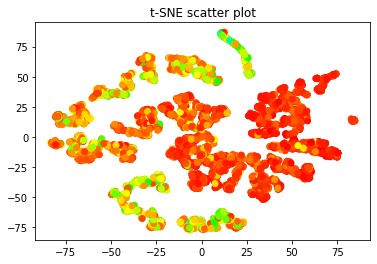

In [18]:
plt.scatter(components[:,0],
            components[:,1],
            cmap = "hsv",
            c = dataset["rent amount"])
plt.title("t-SNE scatter plot")
plt.show()

- there is most red point;
- Many overlappings;